In [2]:
import yfinance as yf

ticker = yf.Ticker("2330.TW")  # 台積電台股代號加上.TW
df = ticker.history(period="max")  # 取得全部歷史資料
print(df.head())

                                Open       High        Low      Close  \
Date                                                                    
2000-01-04 00:00:00+08:00  33.784504  33.784504  33.215107  33.784504   
2000-01-05 00:00:00+08:00  33.784504  34.543640  33.404845  34.543640   
2000-01-06 00:00:00+08:00  34.353901  34.543640  33.784504  33.784504   
2000-01-07 00:00:00+08:00  32.645707  33.215104  32.266048  32.835445   
2000-01-10 00:00:00+08:00  33.784497  34.163974  33.215100  33.974236   

                                 Volume  Dividends  Stock Splits  
Date                                                              
2000-01-04 00:00:00+08:00  200662336736        0.0           0.0  
2000-01-05 00:00:00+08:00  402466805912        0.0           0.0  
2000-01-06 00:00:00+08:00  197545715802        0.0           0.0  
2000-01-07 00:00:00+08:00  235270344752        0.0           0.0  
2000-01-10 00:00:00+08:00  276171685539        0.0           0.0  


In [3]:
import yfinance as yf
# 取得 2024 年（1/1 起至 2025/1/1 不含）的台積電交易日資料
df_2024 = ticker.history(start="2024-01-01", end="2025-01-01")
df_2024

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00+08:00,575.038903,577.962830,574.064261,577.962830,26059058,0.0,0.0
2024-01-03 00:00:00+08:00,569.191116,570.165758,561.393977,563.343262,37106763,0.0,0.0
2024-01-04 00:00:00+08:00,565.292480,566.267123,562.368554,565.292480,15309129,0.0,0.0
2024-01-05 00:00:00+08:00,563.343205,565.292490,559.444636,561.393921,18158971,0.0,0.0
2024-01-08 00:00:00+08:00,567.241727,570.165654,564.317801,568.216370,17761275,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-25 00:00:00+08:00,1080.358973,1080.358973,1070.447423,1075.403198,15481622,0.0,0.0
2024-12-26 00:00:00+08:00,1075.403198,1080.358973,1075.403198,1075.403198,14374900,0.0,0.0
2024-12-27 00:00:00+08:00,1070.447337,1085.314661,1070.447337,1080.358887,24948385,0.0,0.0


In [4]:
import yfinance as yf
#台積電(2330.TW),聯電(2303.TW),聯發科(2454.TW),鴻海(2317.TW)
#取得所有 2024 年（1/1 起至 2025/1/1 不含)
tickers = ["2330.TW", "2303.TW", "2454.TW", "2317.TW"]
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    df = stock.history(start="2024-01-01", end="2025-01-01")
    data[ticker] = df
data["2330.TW"]["Close"]  # 顯示台積電的資料

Date
2024-01-02 00:00:00+08:00     577.962830
2024-01-03 00:00:00+08:00     563.343262
2024-01-04 00:00:00+08:00     565.292480
2024-01-05 00:00:00+08:00     561.393921
2024-01-08 00:00:00+08:00     568.216370
                                ...     
2024-12-25 00:00:00+08:00    1075.403198
2024-12-26 00:00:00+08:00    1075.403198
2024-12-27 00:00:00+08:00    1080.358887
2024-12-30 00:00:00+08:00    1080.358887
2024-12-31 00:00:00+08:00    1065.491577
Name: Close, Length: 242, dtype: float64

In [5]:
#data有四檔股票的2024年交易日資料,我需要每一個的收盤價,最後產生一個DataFrame
import pandas as pd
close_prices = {ticker: df["Close"] for ticker, df in data.items()} # 使用字典生成式
close_prices_df = pd.DataFrame(close_prices)
close_prices_df.columns = ["台積電", "聯電", "聯發科", "鴻海"]
close_prices_df

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02 00:00:00+08:00,577.962830,46.182152,898.153015,98.787247
2024-01-03 00:00:00+08:00,563.343262,45.025372,872.517639,98.316833
2024-01-04 00:00:00+08:00,565.292480,45.203339,872.141724,97.846420
2024-01-05 00:00:00+08:00,561.393921,45.203339,865.563049,97.846420
2024-01-08 00:00:00+08:00,568.216370,44.936390,864.623291,95.494339
...,...,...,...,...
2024-12-25 00:00:00+08:00,1075.403198,41.378731,1354.440308,179.964066
2024-12-26 00:00:00+08:00,1075.403198,41.049957,1364.046265,180.929031
2024-12-27 00:00:00+08:00,1080.358887,40.956017,1373.652222,179.964066


In [6]:
my_dict = {'name': 'Alice', 'age': 25}
for key, value in my_dict.items():
    print(f"Key: {key}, Value: {value}")

Key: name, Value: Alice
Key: age, Value: 25


In [7]:
close_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2024-01-02 00:00:00+08:00 to 2024-12-31 00:00:00+08:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   台積電     242 non-null    float64
 1   聯電      242 non-null    float64
 2   聯發科     242 non-null    float64
 3   鴻海      242 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [8]:
#close_prices_df的索引,只要顯示日期不要顯示時間
#index的data type必需還是datetime格式
close_prices_df.index = pd.to_datetime(close_prices_df.index)

close_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2024-01-02 00:00:00+08:00 to 2024-12-31 00:00:00+08:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   台積電     242 non-null    float64
 1   聯電      242 non-null    float64
 2   聯發科     242 non-null    float64
 3   鴻海      242 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [9]:
#查詢所有股票的相關係數
close_prices_df.corr()

,台積電,聯電,聯發科,鴻海
台積電,1.000000,0.124844,0.883301,0.932589
聯電,0.124844,1.000000,0.143217,0.294091
聯發科,0.883301,0.143217,1.000000,0.831721
鴻海,0.932589,0.294091,0.831721,1.000000


In [11]:
import wget
import os
#不要重複下載
if not os.path.exists("ChineseFont.ttf"):
    wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

In [12]:
#已經有中文字型`ChineseFont.ttf`
#接下來要設定字型
#matplotlib預設字型為ChineseFont.ttf
from matplotlib.font_manager import fontManager
import matplotlib as mpl
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family='ChineseFont')

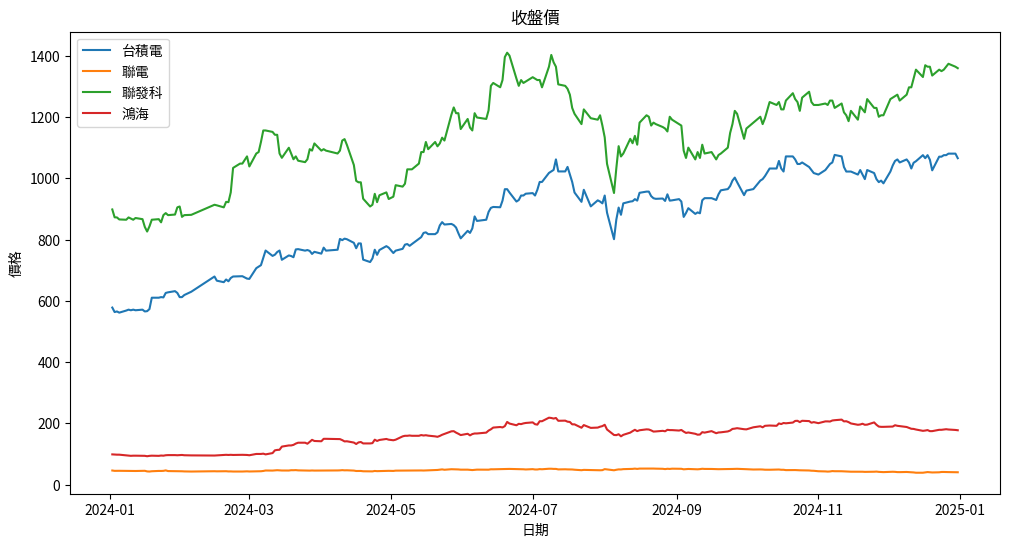

In [14]:
#close_prices_df,建立線圖
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in close_prices_df.columns:
    plt.plot(close_prices_df.index, close_prices_df[column], label=column)
plt.title('收盤價')
plt.xlabel('日期')
plt.ylabel('價格')
plt.legend()
plt.show()